#linear regression

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) #built in function in scikitlearn to load a diabetes dataset
                                                                 #Returns a tuple of two ndarray of shape (n_samples, n_features) A 2D array with each row representing one sample and each column representing the features and/or target of a given sample.
                                                                 #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

# Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

# Data Set Characteristics:

# Number of Instances:
# 442

# Number of Attributes:
# First 10 columns are numeric predictive values

# Target:
# Column 11 is a quantitative measure of disease progression one year after baseline

# Attribute Information:
# age age in years
# sex
# bmi body mass index
# bp average blood pressure
# s1 tc, total serum cholesterol
# s2 ldl, low-density lipoproteins
# s3 hdl, high-density lipoproteins
# s4 tch, total cholesterol / HDL
# s5 ltg, possibly log of serum triglycerides level
# s6 glu, blood sugar level
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).



In [13]:
dfy = pd.DataFrame(diabetes_y)#load into pandas dataframe to facilitate data operations
dfy.head(5) #show top x rows


,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [14]:
dfy.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [15]:
df = pd.DataFrame(diabetes_X)#load into pandas dataframe to facilitate data operations
df.head(5) #show top x rows

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


#we will continue with 1 feature

In [17]:
# Use only one feature

print(diabetes_X.shape)

diabetes_X = diabetes_X[:,2] #allrows, only 2nd column --> shape (422,)
print(diabetes_X.shape)

diabetes_X = diabetes_X[:,np.newaxis] #add new dimension of size 1 --> shape (422,1)

#ALTERNATIVE--
#diabetes_X = diabetes_X[:, np.newaxis, 2] #take all rows, add extra dimension to array of 10, select second feature (column nr 2)
#                                           # diabetes_X is the column 2
#---

print(diabetes_X.shape)


(442, 10)
(442,)
(442, 1)


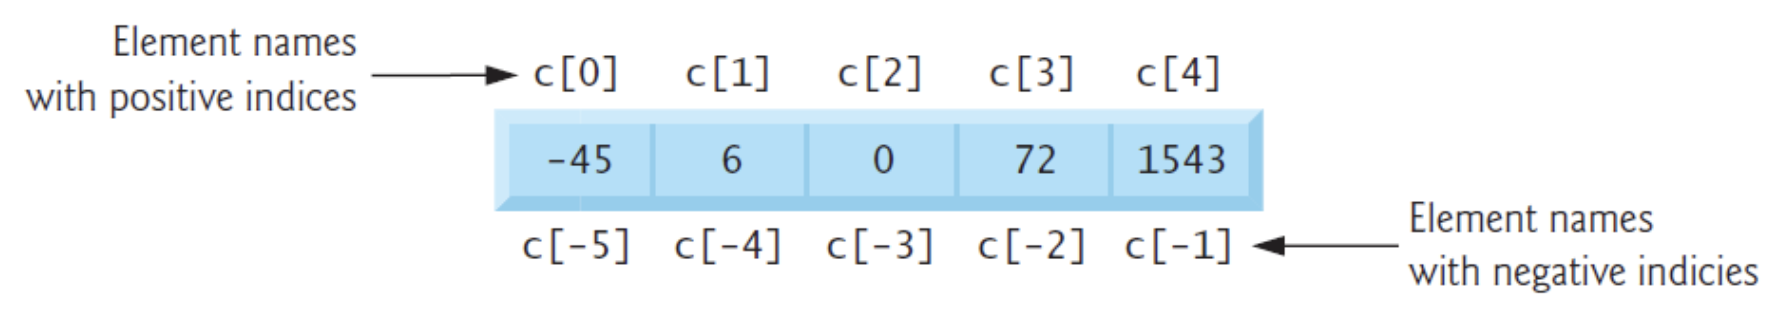

#prepare train/test

for simplicity not using a validation set

In [18]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #all but last 20 rows
diabetes_X_test = diabetes_X[-20:] #last 20 rows
print(diabetes_X_train.shape)  #shape is (422,1) --> instance [value]
print(diabetes_X_test.shape)



# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
print(diabetes_y_train.shape) #shape is (422,) --> instance value (not in array)
print(diabetes_y_test.shape)

print(diabetes_X_train[0])
print(diabetes_y_train[0])


#difference in shape - why?
# expected parameters of 'fit' method
#X - array-like, sparse matrix of shape (n_samples, n_features)
#Y - array-like of shape (n_samples,) or (n_samples, n_targets)

(422, 1)
(20, 1)
(422,)
(20,)
[0.06169621]
151.0


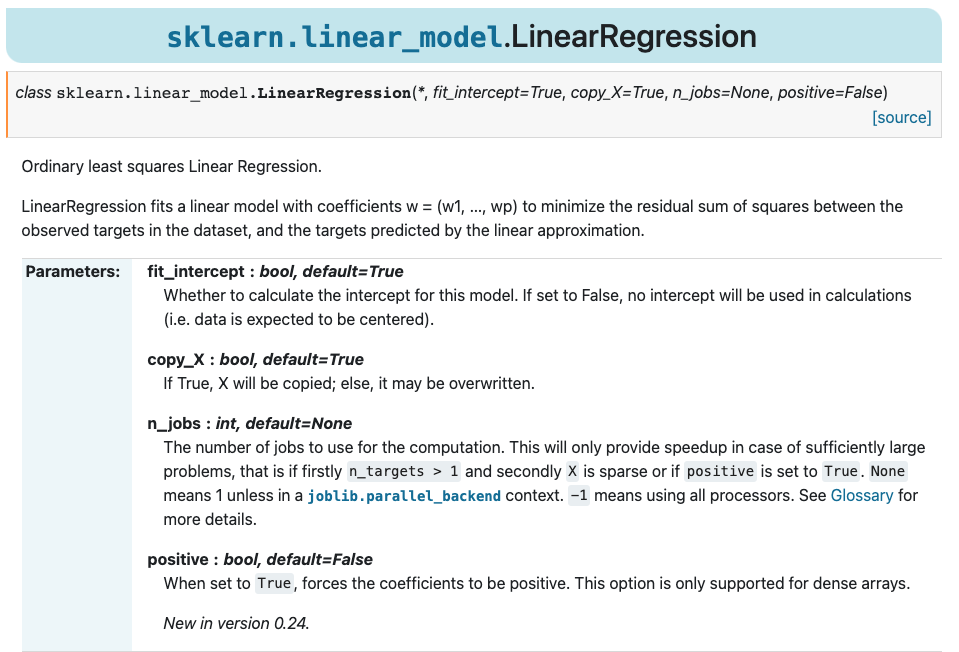

#train the model

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept = True)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

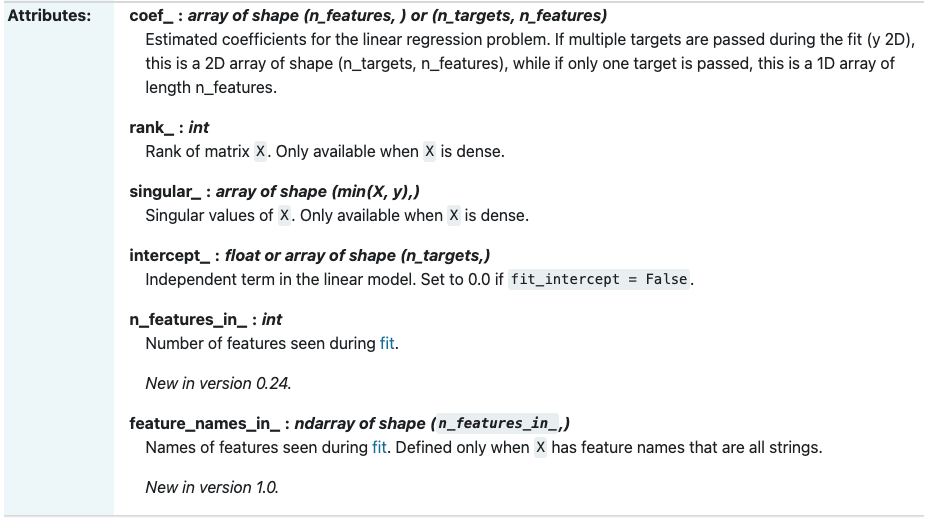

In [20]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
print("Interecept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The root mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination / R2: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))




# R2 value of 47% = 47% of the variance can be explained by the model.
#Variance = measure of spread compared to mean
# is 47% a good metric?


Coefficients: 
 [938.23786125]
Interecept: 
 152.91886182616113
Mean squared error: 2548.07
Root Mean squared error: 50.48
Coefficient of determination / R2: 0.47


C:\Users\Tanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


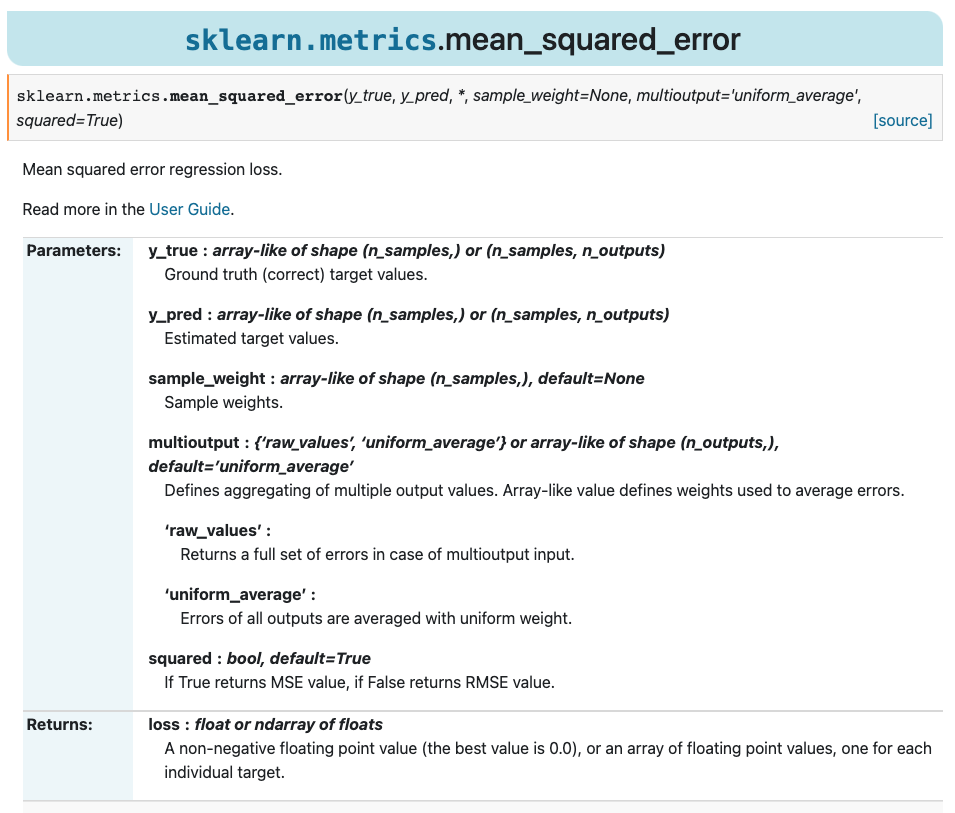

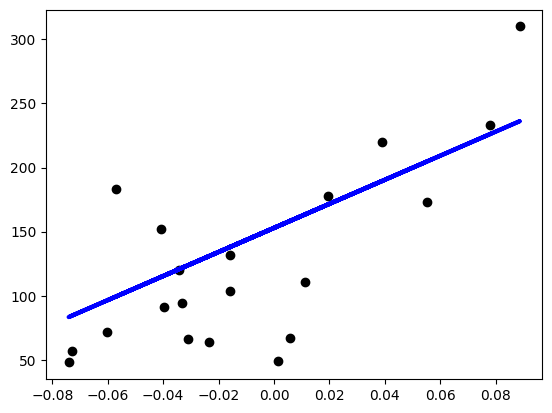

In [21]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black") #plot xy test set
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3) #plot Xtest and ypredicted

plt.xticks()
plt.yticks()

plt.show()